In [0]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/GenderClassification/GenderGlass")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# from os import walk
# from random import randint
# from shutil import copyfile
# from tqdm import *

# if not os.path.exists('dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/train'):
#     os.makedirs('dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/train')
    
# if not os.path.exists('dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/test'):
#     os.makedirs('dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/test')

# for (dirpath, dirnames, filenames) in walk('dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/output'):
#     for filename in tqdm(filenames):
#         if not os.path.isfile('%s/%s'%(dirpath, filename)):
#             if "_flip" in filename:
#                 #print(filename)
#                 random = randint(0, 9)
#                 if random <= 7:
#                     copyfile('%s/%s'%(dirpath,filename), 'dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/train/%s'%filename)
#                     flip_file_name = filename.replace('_flip.npy','.npy')
#                     copyfile('%s/%s'%(dirpath,flip_file_name), 'dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/train/%s'%flip_file_name)
#                 else:
#                     copyfile('%s/%s'%(dirpath,filename), 'dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/test/%s'%filename)
#                     flip_file_name = filename.replace('_flip.npy','.npy')
#                     copyfile('%s/%s'%(dirpath,flip_file_name), 'dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/test/%s'%flip_file_name)
#     break

100%|██████████| 5096/5096 [00:02<00:00, 1970.73it/s]


In [0]:
from os import walk
glass = []
nglass = []

for (dirpath, dirnames, filenames) in walk('embedding/f_glass'):
    path = ['f_glass/' + s for s in filenames]
    glass.extend(path)
    break

print(len(glass))

for (dirpath, dirnames, filenames) in walk('embedding/m_glass'):
    path = ['m_glass/' + s for s in filenames]
    glass.extend(path)
    break

print(len(glass))

for (dirpath, dirnames, filenames) in walk('embedding/f_nglass'):
    path = ['f_nglass/' + s for s in filenames]
    nglass.extend(path)
    break

print(len(nglass))

for (dirpath, dirnames, filenames) in walk('embedding/m_nglass'):
    path = ['m_nglass/' + s for s in filenames]
    nglass.extend(path)
    break

print(len(nglass))

604
1112
543
1045


In [0]:
import numpy as np

y_glass = []
glass_label = np.zeros(2, dtype=int)
glass_label[0] = 1
for i in range(len(glass)):
    y_glass.append(glass_label)

#print(y_glass)
y_glass = np.array(y_glass)
#print(y_glass)
print(len(y_glass))

y_nglass = []
nglass_label = np.zeros(2, dtype=int)
nglass_label[1] = 1
for i in range(len(nglass)):
    y_nglass.append(nglass_label)
y_nglass = np.array(y_nglass)
print(len(y_nglass))

X = np.concatenate([glass, nglass])
print(len(X))
y = np.concatenate([y_glass, y_nglass])
print(len(Y))

1112
1045
2157
2157


In [0]:
# import pandas as pd
# import numpy as np
# import os
# from tqdm import *
# from multiprocessing import Pool, cpu_count
# import os.path

# lines = ''
# with open('AdienceBenchmarkGenderAndAgeClassification/all.txt') as text:
#     lines = text.readlines()

# y_train = []

# def get_one_hot_label(filename):
#     #global y_train
#     label = np.zeros(2, dtype=int)
#     for line in lines[1:]:
#         line = line.strip().split("\t")
#         #print('filename=%s line1=%s gender=%s'%(filename[:-3],line[1][:-3],line[4]))
#         file_name = line[2] + '.' + line[1][:-3]
#         #print('filename=%s'%filename)
#         if file_name in filename[:-3]:
#             #print('%s found'%filename)
    
#             #print(line[4])
#             if line[4] == 'm':
#                 label[1] = 1
#             if line[4] == 'f':
#                 label[0] = 1
#             #print(label)
#             #y_train.append(label)
#             #print(y_train)
#     return label

def my_process1(file_name):
    emb_path = 'embedding/%s'%file_name
    #if os.path.isfile(emb_path):
    #print(file_name)
    emb = np.load(emb_path)
    return emb

# def my_process5(file_name):
#     #print(file_name)
#     return get_one_hot_label(file_name)

# def my_process2(file_name):
#     emb_path = 'dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/train/%s'%file_name
#     #if os.path.isfile(emb_path):
#     emb = np.load(emb_path)
#     return emb

# def my_process3(file_name):
#     emb_path = 'dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/test/%s'%file_name
#     #if os.path.isfile(emb_path):
#     emb = np.load(emb_path)
#     return emb

# def my_process4(file_name):
#     emb_path = 'dnb-facerecognition-aivivn/models/vgg_face2/resnet50_128_pytorch/embedding/test/%s'%file_name
#     #if os.path.isfile(emb_path):
#     emb = np.load(emb_path)
#     return emb

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
train_data = []
for filename in X_train:
    train_data.append(my_process1(filename))

train_data = np.array(train_data)
print(train_data.shape)
np.save('train_data.npy', train_data)

test_data = []
for filename in X_test:
    test_data.append(my_process1(filename))

test_data = np.array(test_data)
print(train_data.shape)
np.save('test_data.npy', test_data)

(1725, 128)
(1725, 128)


In [0]:
# i = 0
# for filename in train:
#     print(filename)
#     print(y_train_data[i])
#     i += 1

In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())


Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np

import keras
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import *
from keras.models import *
from keras.layers import Input, concatenate, Conv2D, Activation, BatchNormalization, Dense, Dropout, Flatten, add, Lambda
import tensorflow as tf
from keras import backend as K
from keras.utils import multi_gpu_model
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
#from clr_callback import CyclicLR
import random
import threading
from random import randint
import os

BATCH_SIZE = 32
EPOCHS = 300
NUMBER_OF_FOLDS = 5
NUMBER_OF_PARTS = 4
INPUT_DIM = 128
NUMBER_OF_CLASSES = 2

In [0]:
def Model():
    model = Sequential()
    model.add(Dense(1024, input_dim=INPUT_DIM, init='uniform'))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(NUMBER_OF_CLASSES, init='uniform'))
    model.add(Activation('softmax'))
    return model

In [0]:
xtrain = np.load('train_data.npy')
# xtrain_flip = np.load('train_flip_data.npy')
# ytrain = y_train_data
# ytrain_flip = y_train_flip_data
xtest = np.load('test_data.npy')
# xtest_flip = np.load('test_flip_data.npy')
# ytest = y_test_data
# ytest_flip = y_test_flip_data

if not os.path.exists('weights'):
    os.makedirs('weights')

ptest = np.zeros((X_test.shape[0], NUMBER_OF_CLASSES), dtype = np.float64)
training_log = open('training_log.txt', 'w')
loss_average = 0.0
acc_average = 0.0
for fold in range(NUMBER_OF_FOLDS):
    #xtrain_fold = np.vstack((xtrain,xtrain_flip))
    #ytrain_fold = np.vstack((ytrain,ytrain_flip))

    xtest_fold = xtest#np.vstack((xtest,xtest_flip))
    #ytest_fold = np.vstack((ytest,ytest_flip))

    xtrain_fold, ytrain_fold = shuffle(xtrain, y_train)
    
    train_steps = np.ceil(float(len(xtrain_fold)) / float(BATCH_SIZE))
    
    WEIGHTS_BEST = 'weights/best_weight_fold%d.hdf5'%fold

    clr = CyclicLR(base_lr=1e-7, max_lr=2e-4, step_size=4*train_steps, mode='exp_range',gamma=0.99994)
    early_stopping = EarlyStopping(monitor='val_acc', patience=20, verbose=1, mode='max')
    save_checkpoint = ModelCheckpoint(WEIGHTS_BEST, monitor = 'val_acc', verbose = 1, save_weights_only = True, save_best_only=True, mode='max')
    callbacks = [save_checkpoint, early_stopping, clr]
    #callbacks = [save_checkpoint, clr]
    
    model = Model()
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=2e-4), metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer=Adam(lr=2e-4), metrics=['accuracy'])
    model.fit(xtrain_fold, ytrain_fold, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(xtest_fold, y_test), callbacks=callbacks, shuffle=True)

    model.load_weights(WEIGHTS_BEST)

    ptest += model.predict(xtest_fold, batch_size=BATCH_SIZE, verbose=1)
    #ptest += model.predict(xtest_flip, batch_size=BATCH_SIZE, verbose=1)

    score = model.evaluate(x=xtest_fold, y=y_test, batch_size=BATCH_SIZE, verbose=1)
    loss_average += score[0]
    acc_average += score[1]
    training_log.write('LOSS:%f ACC:%f\n'%(score[0], score[1]))

    K.clear_session()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, input_dim=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="uniform")`
  


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              132096    
_________________________________________________________________
activation_9 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 2050      
_________________________________________________________________
activation_10 (Activation)   (None, 2)                 0         
Total params: 134,146
Trainable params: 134,146
Non-trainable params: 0
_________________________________________________________________
Train on 1725 samples, validate on 432 samples
Epoch 1/300
1725/1725 [==============================] - 1s 367us/s

In [0]:
WEIGHTS_BEST = 'weights/best_weight_fold4.hdf5'

model = Model()

#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=2e-4), metrics=['accuracy'])
model.load_weights(WEIGHTS_BEST)
predictions = model.predict(xtest, verbose=0)

i=0
count = 0
total = 0
for filename in X_test:
    label = -1
    if predictions[i][0] >= predictions[i][1]:
        label = 0
        print('I am {:.2%} sure he have glass {:.2%}'.format(predictions[i][0], predictions[i][1]))
    else:
        label = 1
        print('I am {:.2%} sure he haven\'t glass {:.2%}'.format(predictions[i][1], predictions[i][0]))
    if(label == y_test[i][1]):
        print('true, filename=%s label=%d'%(filename, y_test[i][0]))
        count +=1
    else:
        print('false, filename=%s label=%d'%(filename, y_test[i][0]))
    i+=1
    total +=1
acc = float(count/total)
print(acc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, input_dim=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="uniform")`
  


I am 94.63% sure he have glass 5.37%
true, filename=m_glass/143.npy label=1
I am 88.61% sure he haven't glass 11.39%
true, filename=m_nglass/023.npy label=0
I am 93.96% sure he haven't glass 6.04%
true, filename=m_nglass/204.npy label=0
I am 79.22% sure he haven't glass 20.78%
true, filename=m_nglass/003.npy label=0
I am 95.73% sure he have glass 4.27%
true, filename=f_glass/478.npy label=1
I am 98.89% sure he haven't glass 1.11%
true, filename=m_nglass/076.npy label=0
I am 95.09% sure he haven't glass 4.91%
true, filename=f_nglass/341.npy label=0
I am 92.65% sure he have glass 7.35%
true, filename=m_glass/302.npy label=1
I am 90.82% sure he have glass 9.18%
true, filename=m_glass/002.npy label=1
I am 50.33% sure he haven't glass 49.67%
false, filename=m_glass/067.npy label=1
I am 97.83% sure he haven't glass 2.17%
true, filename=f_nglass/397.npy label=0
I am 95.32% sure he have glass 4.68%
true, filename=f_glass/360.npy label=1
I am 81.38% sure he have glass 18.62%
true, filename=f_gl

In [0]:
!ls GenderGlas

ls: cannot access 'GenderGlass': No such file or directory


(256, 256, 3)


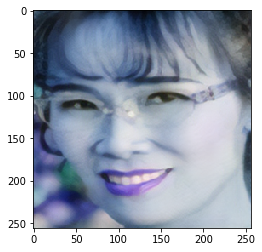

In [0]:
import cv2
import os
import matplotlib.pyplot as plt

im = cv2.imread('image-super-resolution/data/f_glass/288.png')
print(im.shape)
plt.imshow(im)
plt.show()